# Concatenate the datasets

The task of this project is to evaluate integration methods from the [scib](https://github.com/theislab/scib) library on data from the following publications:
* [Single-Cell RNA-Seq Reveals Cellular Heterogeneity of Pluripotency Transition and X Chromosome Dynamics during Early Mouse Development](https://doi.org/10.1016/j.celrep.2019.02.031)

* [The emergent landscape of the mouse gut endoderm at single-cell resolution](https://doi.org/10.1038/s41586-019-1127-1)

* [Characterisation of the transcriptional dynamics underpinning the function, fate, and migration of the mouse Anterior Visceral Endoderm](https://doi.org/10.1101/2021.06.25.449902)

* [Multi-omics profiling of mouse gastrulation at single-cell resolution](https://doi.org/10.1038/s41586-019-1825-8)


We only use data from stage (embryonic day) 5.5, but that has been accounted to before

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import scanpy as sc
import anndata

### Load all four datasets and look at their structure

In [3]:
adata_n = sc.read("../data/raw_e55/Nowotschin_E55.h5ad")
adata_t = sc.read("../data/raw_e55/Thowfeequ_E55.h5ad")
adata_c = sc.read("../data/raw_e55/Cheng_E55.h5ad")
adata_a = sc.read("../data/raw_e55/Argelaguet_E55.h5ad")

In [4]:
for name, adata in {"Cheng": adata_c, "Nowotschin": adata_n, "Argelaguet": adata_a, "Thowfeequ":adata_t}.items():
    print(name)
    print(adata)
    print("\n")

Cheng
AnnData object with n_obs × n_vars = 269 × 18041
    obs: 'embryonic_day', 'cell_type', 'atp', 'batch'
    var: 'gene_symbol'


Nowotschin
AnnData object with n_obs × n_vars = 11550 × 20897
    obs: 'Cluster', 'Timepoint', 'CellType'


Argelaguet
AnnData object with n_obs × n_vars = 168 × 21806
    obs: 'nCount_RNA', 'nFeature_RNA', 'id_rna', 'id_met', 'id_acc', 'sample', 'embryo', 'plate', 'stage', 'method', 'mit_percent_RNA', 'rib_percent_RNA', 'pass_rnaQC', 'sizeFactor', 'celltype', 'celltype.score', 'closest.cell', 'nCG', 'met_rate', 'nGC', 'acc_rate', 'pass_metQC', 'pass_accQC'
    uns: 'X_name'


Thowfeequ
AnnData object with n_obs × n_vars = 252 × 54829
    obs: 'Run lane', 'Label', 'Stage', 'gene count', 'gene count rpm', 'fraction mapped', 'fraction mito', 'fraction spike-in', 'total reads (log10)', 'clusters', 'clusters_new', 'CellType', 'CellType_merged'




### All datasets contain raw, unnormalized counts

In [5]:
adata_t.to_df().head(2)

,Gnai3,Pbsn,Cdc45,H19,Scml2,Apoh,Narf,Cav2,Klf6,Scmh1,...,ERCC-00157,ERCC-00158,ERCC-00160,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171
SS.sc7784898,23.0,0.0,9.0,43.0,0.0,0.0,4.0,0.0,87.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,104.0
SS.sc7784899,68.0,0.0,0.0,78.0,0.0,0.0,56.0,0.0,64.0,0.0,...,0.0,0.0,3.0,0.0,9.0,0.0,9.0,0.0,0.0,320.0


In [6]:
adata_c.to_df().head(2)

,Adora1,Prim2,Bai3,Cflar,Gpr39,Obsl1,Syt14,Pld5,Lmx1a,Lactb2,...,Emx2,Rab11fip2,Fam204a,Prlhr,Eif3a,Nanos1,Prdx3,Sfxn4,Gm7102,Csf2ra
EB_1006,0.0,179.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,86.0,...,0.0,0.0,89.0,0.0,1047.0,1.0,146.0,0.0,2.0,28.0
EB_1007,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,63.0,0.0,399.0,0.0,200.0,0.0,0.0,0.0


In [7]:
adata_n.to_df().head(2)

index,Nfatc1,Map3k13,Cyp2b23,Ralgps2,Tigar,Gm15138,Polr1d,Phf20l1,Gm3512,Fahd2a,...,Lgi2,Naf1,Ercc6l,4931406P16Rik,Zfp418,Dctd,Cd200,Rp24-395p13.2,Htr1f,Tmem200b
index,,,,,,,,,,,,,,,,,,,,,
Lib2-1_E5.5_TTTATGCTCAGTTTGG,0.0,0.0,0.0,0.0,1.0,1.0,15.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Lib2-1_E5.5_TTTATGCTCACCACCT,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
adata_a.to_df().head(2)

,Xkr4,Rp1,Sox17,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,...,Gm20820,Gm21477,Gm20906,Gm28102,Gm21294,Gm21996,Gm20837,Gm21860,Erdr1,Gm21748
lane5998_AAGAGGCA_AAGGAGTA_Plate1_E09_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,0.0,51.0,14.0,0.0,37.0,0.0,47.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lane5998_AAGAGGCA_ACTGCATA_Plate1_D09_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,0.0,35.0,15.0,0.0,13.0,0.0,21.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


## Let's clean them up one by one

### Nowotschin

In [9]:
adata_n = sc.read("../data/raw_e55/Nowotschin_E55.h5ad")

In [10]:
adata_n.obs[:].head(2)

,Cluster,Timepoint,CellType
index,,,
Lib2-1_E5.5_TTTATGCTCAGTTTGG,E5.5: 7,E5.5,ExE
Lib2-1_E5.5_TTTATGCTCACCACCT,E5.5:0,E5.5,EPI


In [11]:
for obs in ["Cluster", "Timepoint"]:
    del adata_n.obs[obs]
adata_n.obs[:].head(2)

,CellType
index,
Lib2-1_E5.5_TTTATGCTCAGTTTGG,ExE
Lib2-1_E5.5_TTTATGCTCACCACCT,EPI


Extract batch ids from cell names

In [12]:
adata_n.obs.index

Index(['Lib2-1_E5.5_TTTATGCTCAGTTTGG', 'Lib2-1_E5.5_TTTATGCTCACCACCT',
       'Lib2-1_E5.5_TTTATGCAGCCTATGT', 'Lib2-1_E5.5_TTTATGCGTCTCATCC',
       'Lib2-1_E5.5_TTTACTGTCGCGTTTC', 'Lib2-1_E5.5_TTTACTGAGATCCGAG',
       'Lib2-1_E5.5_TTTACTGAGACGCACA', 'Lib2-1_E5.5_TTTACTGCATATGAGA',
       'Lib2-1_E5.5_TTTGTCATCTCACATT', 'Lib2-1_E5.5_TTTGTCATCAGCACAT',
       ...
       'Lib2-3_E5.5_CCCAATCCACGGCGTT', 'Lib2-3_E5.5_CCCAGTTTCGCCCTTA',
       'Lib2-3_E5.5_CCCAGTTAGAATGTGT', 'Lib2-3_E5.5_CCCAGTTAGCGTTGCC',
       'Lib2-3_E5.5_CCCAGTTGTAGAAAGG', 'Lib2-3_E5.5_CCCAGTTGTCTAACGT',
       'Lib2-3_E5.5_CCCAGTTGTCTAGCGC', 'Lib2-3_E5.5_CCCAGTTCATTACGAC',
       'Lib2-3_E5.5_CCCAGTTCAACACCCG', 'Lib2-3_E5.5_CCCAGTTCACCGTTGG'],
      dtype='object', name='index', length=11550)

In [13]:
adata_n.obs["batch_id"]="none"

In [14]:
adata_n.obs.rename(columns={"CellType": "cell_type"}, inplace=True)
for index in range(len(adata_n.obs.index)):
    adata_n.obs["batch_id"][index]="Nowotschin_"+str(adata_n.obs.index[index][5])
adata_n.obs["batch_id"].unique()

array(['Nowotschin_1', 'Nowotschin_2', 'Nowotschin_3'], dtype=object)

In [15]:
adata_n.obs[:].head(2)

,cell_type,batch_id
index,,
Lib2-1_E5.5_TTTATGCTCAGTTTGG,ExE,Nowotschin_1
Lib2-1_E5.5_TTTATGCTCACCACCT,EPI,Nowotschin_1


Merge cell types

In [16]:
adata_n.obs["cell_type"].unique()

['ExE', 'EPI', 'emVE', 'exVE', 'VE']
Categories (5, object): ['EPI', 'ExE', 'VE', 'emVE', 'exVE']

### Thow

In [17]:
adata_t = sc.read("../data/raw_e55/Thowfeequ_E55.h5ad")

In [18]:
adata_t

AnnData object with n_obs × n_vars = 252 × 54829
    obs: 'Run lane', 'Label', 'Stage', 'gene count', 'gene count rpm', 'fraction mapped', 'fraction mito', 'fraction spike-in', 'total reads (log10)', 'clusters', 'clusters_new', 'CellType', 'CellType_merged'

In [19]:
adata_t.var_names_make_unique()
adata_t

AnnData object with n_obs × n_vars = 252 × 54829
    obs: 'Run lane', 'Label', 'Stage', 'gene count', 'gene count rpm', 'fraction mapped', 'fraction mito', 'fraction spike-in', 'total reads (log10)', 'clusters', 'clusters_new', 'CellType', 'CellType_merged'

In [20]:
adata_t.obs.rename(columns={"Label": "batch_id", "CellType_merged": "cell_type"}, inplace=True)
adata_t.obs["batch_id"] = "Thowfeequ"
adata_t.obs[:].head(2)

,Run lane,batch_id,Stage,gene count,gene count rpm,fraction mapped,fraction mito,fraction spike-in,total reads (log10),clusters,clusters_new,CellType,cell_type
SS.sc7784898,SS-sc7784898,Thowfeequ,E5.5,8837,7168,0.7203458103581049,0.01249990099802118,0.007375901273398991,5.488210762149852,1,1,emVE,VE
SS.sc7784899,SS-sc7784899,Thowfeequ,E5.5,8611,7134,0.7074472439362256,0.010738377957458273,0.0135335593015619,5.724167692220384,1,5,AVE,VE


In [21]:
for obs in ["Run lane", "Stage", "fraction mapped", "fraction spike-in", "fraction mito", "gene count rpm", "gene count", "total reads (log10)", "clusters", "clusters_new", "CellType"]:
    del adata_t.obs[obs]
adata_t.obs[:].head(2)

,batch_id,cell_type
SS.sc7784898,Thowfeequ,VE
SS.sc7784899,Thowfeequ,VE


In [22]:
adata_t

AnnData object with n_obs × n_vars = 252 × 54829
    obs: 'batch_id', 'cell_type'

### Cheng

In [23]:
adata_c = sc.read("../data/raw_e55/Cheng_E55.h5ad")

In [24]:
for obs in ["embryonic_day", "atp"]:
    del adata_c.obs[obs]
adata_c.obs.rename(columns={"CellType_merged": "cell_type", "batch": "batch_id"}, inplace=True)
adata_c.obs[:].head(2)

,cell_type,batch_id
EB_1006,VE,Cheng
EB_1007,EPI,Cheng


### Argelaguet

In [25]:
adata_a = sc.read("../data/raw_e55/Argelaguet_E55.h5ad")

In [26]:
adata_a.var_names_make_unique()
adata_a.obs[:].head(2)

,nCount_RNA,nFeature_RNA,id_rna,id_met,id_acc,sample,embryo,plate,stage,method,...,sizeFactor,celltype,celltype.score,closest.cell,nCG,met_rate,nGC,acc_rate,pass_metQC,pass_accQC
lane5998_AAGAGGCA_AAGGAGTA_Plate1_E09_L001_R1_val_1_GRCm38_ERCC_hisat2,288435,6890,lane5998_AAGAGGCA_AAGGAGTA_Plate1_E09_L001_R1_...,E4.5-5.5_new_Plate1_E09,E4.5-5.5_new_Plate1_E09,E5.5_sample_1,E4.5-5.5_new_EM2,E4.5-5.5_new_Plate1,E5.5,nmt,...,0.323422,NA,NA,NA,350,71.71,3291,39.87,FALSE,FALSE
lane5998_AAGAGGCA_ACTGCATA_Plate1_D09_L001_R1_val_1_GRCm38_ERCC_hisat2,218652,6143,lane5998_AAGAGGCA_ACTGCATA_Plate1_D09_L001_R1_...,NA,NA,E5.5_sample_1,E4.5-5.5_new_EM1,E4.5-5.5_new_Plate1,E5.5,rna,...,0.225575,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [27]:
for obs in ['nCount_RNA', 'nFeature_RNA', 'id_rna', 'id_met', 'id_acc', 'sample', 'embryo',
            'plate', 'stage', 'method', 'mit_percent_RNA', 'rib_percent_RNA', 'pass_rnaQC',
            'sizeFactor', 'celltype.score', 'closest.cell', 'nCG', 'met_rate',
            'nGC', 'acc_rate', 'pass_metQC', 'pass_accQC']:
    del adata_a.obs[obs]
adata_a.obs["batch_id"] = "Argelaguet"
adata_a.obs.rename(columns={"celltype": "cell_type"}, inplace=True)
adata_a.obs[:].head(2)

,cell_type,batch_id
lane5998_AAGAGGCA_AAGGAGTA_Plate1_E09_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet
lane5998_AAGAGGCA_ACTGCATA_Plate1_D09_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet


Save raw counts and normalize to get distinct clusters

In [28]:
adata_a.raw = adata_a

In [29]:
sc.pp.log1p(adata_a)
sc.pp.highly_variable_genes(adata_a, n_top_genes=4000, flavor='seurat')
sc.pp.pca(adata_a)
sc.pp.neighbors(adata_a)
sc.tl.umap(adata_a)

Make a coarse leiden clustering to seperate the to cell types

In [30]:
sc.tl.leiden(adata_a, resolution=0.1)

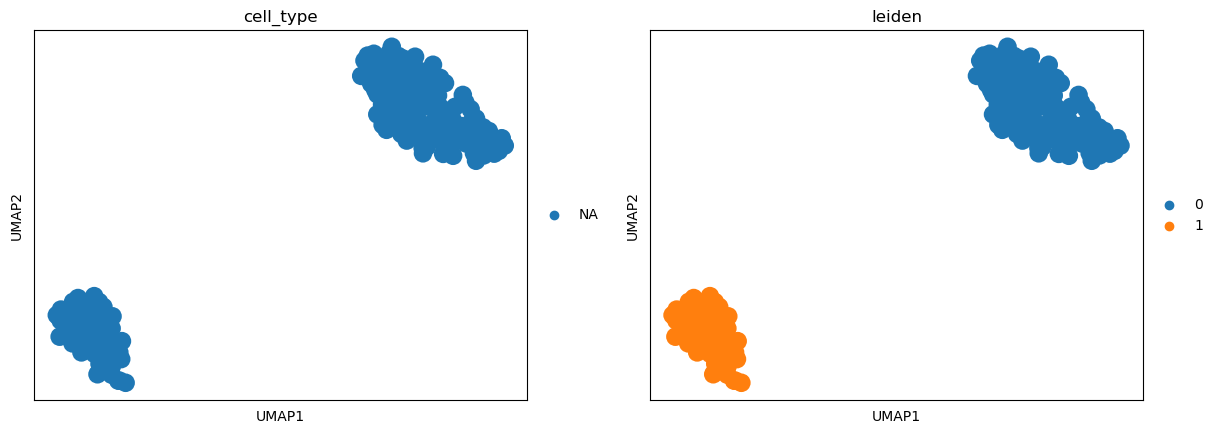

In [31]:
sc.pl.umap(adata_a, color=['cell_type', 'leiden'])

In [32]:
adata_a.obs[:]

,cell_type,batch_id,leiden
lane5998_AAGAGGCA_AAGGAGTA_Plate1_E09_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet,0
lane5998_AAGAGGCA_ACTGCATA_Plate1_D09_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet,1
lane5998_AAGAGGCA_CGTCTAAT_Plate1_G09_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet,0
lane5998_AAGAGGCA_CTAAGCCT_Plate1_F09_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet,1
lane5998_AAGAGGCA_CTCTCTAT_Plate1_A09_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet,0
...,...,...,...
lane5998_TGCAGCTA_CTAAGCCT_Plate2_F11_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet,0
lane5998_TGCAGCTA_CTCTCTAT_Plate2_A11_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet,1
lane5998_TGCAGCTA_GTAAGGAG_Plate2_C11_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet,0
lane5998_TGCAGCTA_TATCCTCT_Plate2_B11_L001_R1_val_1_GRCm38_ERCC_hisat2,NA,Argelaguet,0


In [33]:
adata_a.obs["cell_type"] = adata_a.obs["leiden"].map({'0':"EPI", '1':"VE"})
del adata_a.obs["leiden"]
adata_a.obs["cell_type"].unique()

['EPI', 'VE']
Categories (2, object): ['EPI', 'VE']

In [34]:
adata_a = adata_a.raw.to_adata()
adata_a.to_df()

,Xkr4,Rp1,Sox17,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,...,Gm20820,Gm21477,Gm20906,Gm28102,Gm21294,Gm21996,Gm20837,Gm21860,Erdr1,Gm21748
lane5998_AAGAGGCA_AAGGAGTA_Plate1_E09_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,0.0,51.0,14.0,0.0,37.0,0.0,47.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lane5998_AAGAGGCA_ACTGCATA_Plate1_D09_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,0.0,35.0,15.0,0.0,13.0,0.0,21.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
lane5998_AAGAGGCA_CGTCTAAT_Plate1_G09_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,0.0,141.0,2.0,0.0,23.0,0.0,29.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lane5998_AAGAGGCA_CTAAGCCT_Plate1_F09_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,9.0,92.0,65.0,0.0,14.0,0.0,222.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
lane5998_AAGAGGCA_CTCTCTAT_Plate1_A09_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,0.0,39.0,11.0,0.0,32.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lane5998_TGCAGCTA_CTAAGCCT_Plate2_F11_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,0.0,77.0,14.0,0.0,16.0,0.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lane5998_TGCAGCTA_CTCTCTAT_Plate2_A11_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,12.0,67.0,140.0,0.0,34.0,0.0,181.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
lane5998_TGCAGCTA_GTAAGGAG_Plate2_C11_L001_R1_val_1_GRCm38_ERCC_hisat2,0.0,0.0,0.0,88.0,61.0,0.0,99.0,0.0,53.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lane5998_TGCAGCTA_TATCCTCT_Plate2_B11_L001_R1_val_1_GRCm38_ERCC_hisat2,5.0,0.0,0.0,159.0,95.0,0.0,32.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
adata_a

AnnData object with n_obs × n_vars = 168 × 21806
    obs: 'cell_type', 'batch_id'
    uns: 'X_name', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'cell_type_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

## Have a look at the data

In [36]:
for name, adata in {"Cheng": adata_c, "Nowotschin": adata_n, "Argelaguet": adata_a, "Thowfeequ":adata_t}.items():
    print(name)

    adata.raw = adata
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

    sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor='seurat')
    sc.pp.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)

Cheng
Nowotschin
Argelaguet
Thowfeequ


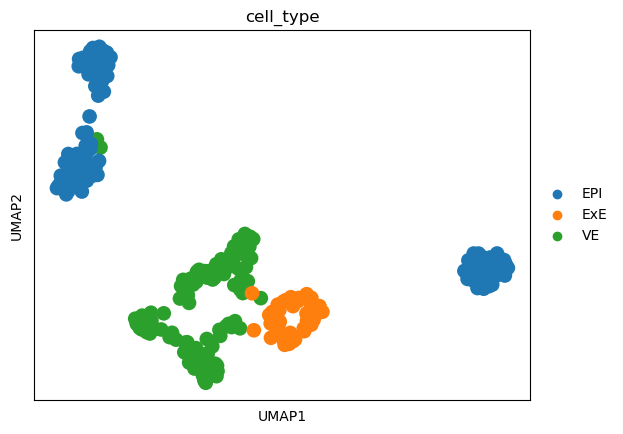

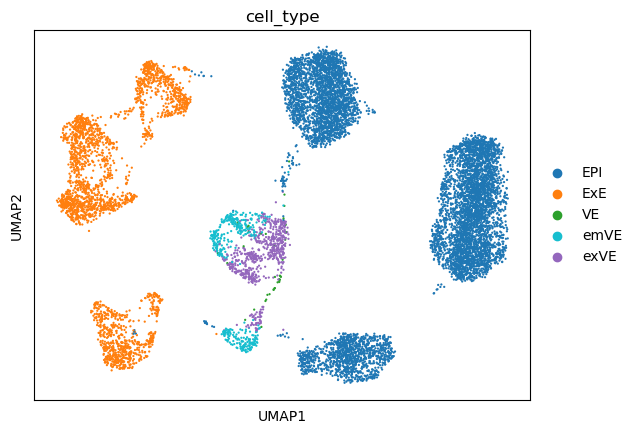

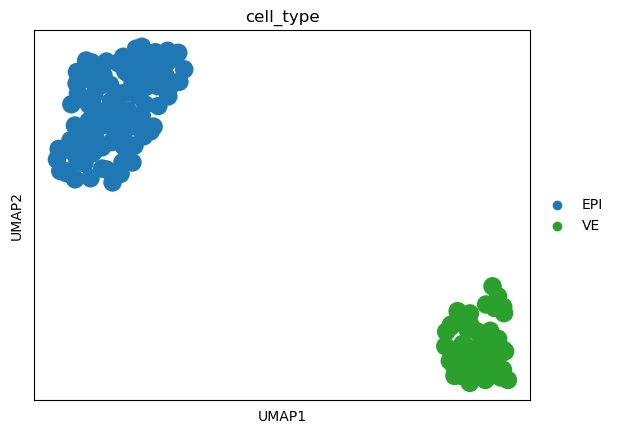

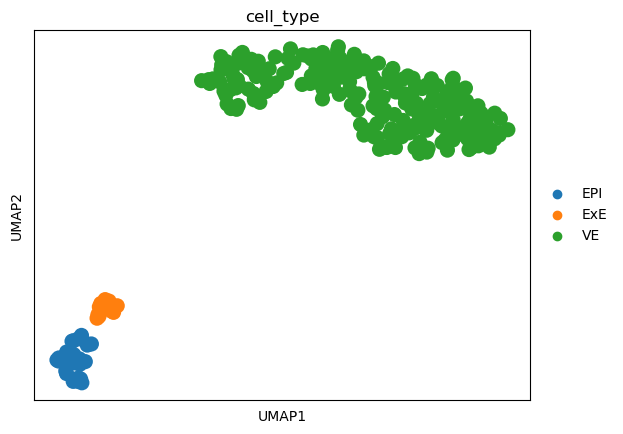

In [37]:
for name, adata in {"Cheng": adata_c, "Nowotschin": adata_n, "Argelaguet": adata_a, "Thowfeequ":adata_t}.items():
    sc.pl.umap(adata, color=['cell_type'], palette={
        "EPI": "tab:blue",
        "ExE": "tab:orange",
        "VE": "tab:green",
        "emVE": "tab:cyan",
        "exVE": "tab:purple",
    })

## Concat

In [38]:
adata_join = adata_c.concatenate(adata_n, adata_a, adata_t)
adata_join

AnnData object with n_obs × n_vars = 12239 × 15456
    obs: 'cell_type', 'batch_id', 'batch'
    var: 'gene_symbol-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'highly_variable-3', 'means-3', 'dispersions-3', 'dispersions_norm-3'
    obsm: 'X_pca', 'X_umap'

In [39]:
sc.pp.highly_variable_genes(adata_join, n_top_genes=4000, flavor='cell_ranger')
sc.pp.pca(adata_join, svd_solver='arpack')
sc.pp.neighbors(adata_join)
sc.tl.umap(adata_join)

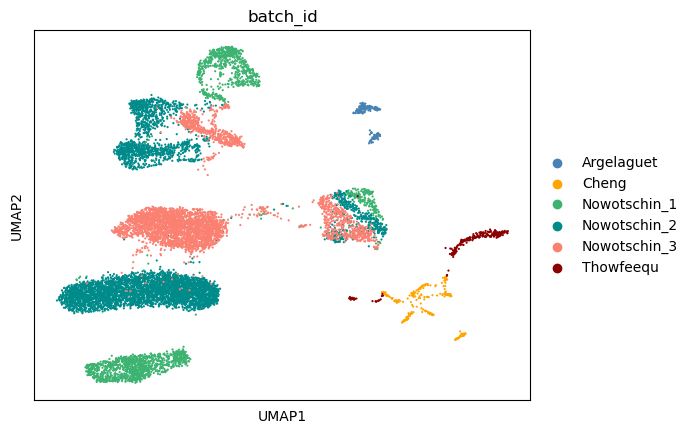

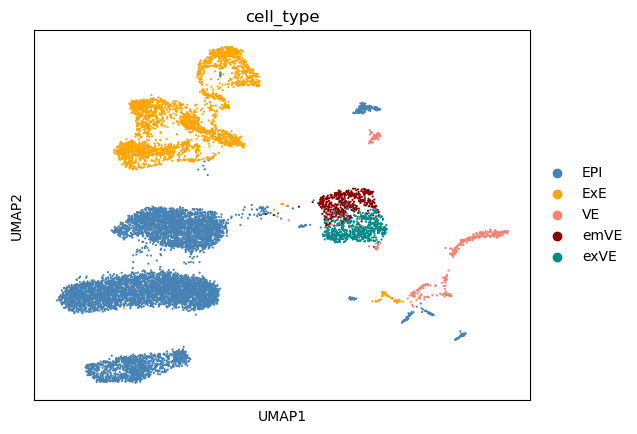

In [40]:
sc.pl.umap(adata_join, color=['batch_id'], palette={
        "Argelaguet": "steelblue",
        "Cheng": "orange",
        "Nowotschin_1": "mediumseagreen",
        "Nowotschin_2": "darkcyan",
        "Nowotschin_3": "salmon",
        "Thowfeequ": "darkred",
    })
sc.pl.umap(adata_join, color=['cell_type'], palette={
        "EPI": "steelblue",
        "ExE": "orange",
        "VE": "salmon",
        "emVE": "darkred",
        "exVE": "darkcyan",
    })

### Final dataset
Let's have a final look at the counts ..

In [41]:
adata_join.to_df()

,Adora1,Prim2,Cflar,Gpr39,Obsl1,Syt14,Pld5,Lmx1a,Lactb2,A830018L16Rik,...,Emx2,Rab11fip2,Fam204a,Prlhr,Eif3a,Nanos1,Prdx3,Sfxn4,Gm7102,Csf2ra
EB_1006-0,0.000000,0.712124,0.000000,0.000000,0.218032,0.0,0.0,0.000000,0.404702,0.00000,...,0.000000,0.000000,0.416245,0.0,1.956325,0.005784,0.613506,0.000000,0.011535,0.150503
EB_1007-0,0.000000,0.290981,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.307952,0.0,1.189071,0.000000,0.763082,0.000000,0.000000,0.000000
EB_1010-0,0.000000,0.461430,0.000000,0.000000,0.786917,0.0,0.0,0.000000,0.102282,0.02365,...,0.000000,0.000000,0.366549,0.0,2.024116,0.000000,0.979564,0.000000,0.000000,0.102282
EB_1009-0,0.144207,0.456277,0.034648,0.000000,0.533628,0.0,0.0,0.000000,0.539812,0.00000,...,0.003519,0.000000,0.312367,0.0,1.469195,0.000000,0.545957,0.128829,0.027814,0.000000
EB_1011-0,0.016766,0.589498,0.000000,0.000000,1.068322,0.0,0.0,0.000000,0.603465,0.00000,...,0.020914,0.000000,0.004218,0.0,1.410550,0.004218,0.909705,0.065439,0.008418,0.049477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS.sc7785265-3,0.196169,0.360095,0.052766,0.052766,0.196169,0.0,0.0,0.000000,0.000000,0.00000,...,0.000000,0.052766,0.102887,0.0,1.186530,0.000000,1.186530,0.102887,0.000000,0.102887
SS.sc7785266-3,0.000000,0.379079,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.973128,0.00000,...,0.000000,0.544840,0.000000,0.0,0.000000,0.000000,0.973128,0.000000,0.000000,0.000000
SS.sc7785267-3,0.061007,0.172876,0.118505,0.000000,1.645428,0.0,0.0,0.000000,0.342802,0.00000,...,0.000000,0.000000,0.090169,0.0,1.776084,0.000000,0.614771,0.118980,0.000000,0.000000
SS.sc7785268-3,0.000000,0.225189,0.032305,0.000000,0.000000,0.0,0.0,0.054606,0.248681,0.00000,...,0.000000,0.000000,0.370870,0.0,1.682260,0.000000,0.351313,0.000000,0.000000,0.080830


.. and metadata.

In [42]:
adata_join.obs[:]

,cell_type,batch_id,batch
EB_1006-0,VE,Cheng,0
EB_1007-0,EPI,Cheng,0
EB_1010-0,VE,Cheng,0
EB_1009-0,VE,Cheng,0
EB_1011-0,VE,Cheng,0
...,...,...,...
SS.sc7785265-3,ExE,Thowfeequ,3
SS.sc7785266-3,VE,Thowfeequ,3
SS.sc7785267-3,VE,Thowfeequ,3
SS.sc7785268-3,EPI,Thowfeequ,3


And save the dataset.

In [43]:
adata_join.write(filename="../data/raw_e55/Concatenated_E55.h5ad")